# Cognitive Neuroscience exam script


Naja Mølle Lindelof


10/6/2024


In [1]:
# Load libraries 
!pip install nilearn
!pip install matplotlib
import os 
import nilearn 
import nibabel as nib
import inspect
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pip

os.system('python -m pip install numpy')
os.system('python -m pip install matplotlib')
os.system('python -m pip install scipy')
os.system('python -m pip install nilearn')
os.system('python -m pip install nibabel')



# First-level analysis
from scipy.stats import norm
from nilearn.glm.first_level import first_level_from_bids
from nilearn import plotting
from nilearn.plotting import plot_design_matrix
from nilearn.plotting import plot_contrast_matrix
from nilearn.reporting import make_glm_report
from nilearn.image import mean_img


# Second-level analysis
from nilearn.glm.second_level import SecondLevelModel
from nilearn.plotting import plot_stat_map
from nilearn.glm import threshold_stats_img
from nilearn.image import get_data, math_img
from nilearn.glm.second_level import non_parametric_inference
import matplotlib.image as mpimg
from matplotlib import rcParams
%matplotlib inline

os.system("pip install atlasreader")
from atlasreader import create_output


Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 55.5 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 7.8 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 31.9 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 46.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 54.2 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 56.3 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.2/38.2 MB 39.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 28.3 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 505.5/505.5 kB 9.4 

In [2]:
# Package version to cite
from importlib.metadata import version
version('nibabel')

'5.2.1'

In [2]:
data_dir = '/work/raw/FaceWord_fMRI/BIDS_2024'

# Get functional meta data with nibabel functions
fmri_file = os.path.join(data_dir, 'derivatives/sub-0125/func/sub-0125_task-EPIsequencewords_run-6_echo-1_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz') 
f_img = nib.load(fmri_file)
print(f_img.shape)
print(f_img.header.get_zooms())
print(f_img.header.get_xyzt_units())

(78, 92, 65, 610)
(2.526, 2.526, 3.0, 1.0)
('mm', 'sec')


## Preprocessing

The data is an output of the fMRIPrep, an fMRI preprocessing pipeline proposed by Esteban et al. (2019).
This entails:
- Skull stripping
- Segmentation 
- Normalization (to MNI space)
- Head-motion correction
- Slice-time correction
- Alignment of T1 and BOLD images to each other and to reference image 


## Imaging Analysis








### First-level analysis

Perform non-Bayesian first-level analysis


In [2]:
# Define task
task_label = 'EPIsequencewords'

## Directories for each year
#data_dir_2021 = '/work/raw/FaceWord_fMRI/BIDS' 
#data_dir_2022 = '/work/raw/FaceWord_fMRI/BIDS_2022' 
data_dir_2023 = '/work/raw/FaceWord_fMRI/BIDS_2023'
data_dir_2024 = '/work/raw/FaceWord_fMRI/BIDS_2024'

## Subject IDs
#subs_2021 = ['0057', '0058', '0059', '0060', '0062', '0064', '0065', '0066']
#subs_2022 = ['0077', '0078', '0080', '0081', '0083', '0084', '0092', '0093', '0094', '0096']
subs_2023 = ['0098', '0099', '0100', '0101', '0103', '0104', '0105', '0106', '0107']
subs_2024 = ['0124', '0125', '0126', '0128', '0129', '0131']

##### 2021 #####
#Define model objects for all 2021 subjects (which were not slice-time corrected during preprocessing)
#models1, models_run_imgs1, models_events1, models_confounds1 = \
#    first_level_from_bids(
        #data_dir_2021, task_label, 
        #sub_labels = subs_2021,
        #minimize_memory=False,
        #slice_time_ref=0.5, #Not used in 2021 & 2022 data, but used in 2023 data 
        #img_filters = [('desc', 'preproc')])
##### 2022 #####
#Define model objects for all 2022 subjects (which were not slice-time corrected during preprocessing)
#models2, models_run_imgs2, models_events2, models_confounds2 = \
    #first_level_from_bids(
     #   data_dir_2022, task_label, 
      #  sub_labels = subs_2022,
        #minimize_memory=False,
        #slice_time_ref=0.5, #Not used in 2021 & 2022 data, but used in 2023 data 
       # img_filters = [('desc', 'preproc')])


##### 2023 #####
models3, models_run_imgs3, models_events3, models_confounds3 = \
    first_level_from_bids(
        data_dir_2023, task_label,
        sub_labels = subs_2023,
        #minimize_memory=False,
        slice_time_ref = 0.458,
        img_filters = [('desc', 'preproc')])

##### 2024 #####
models4, models_run_imgs4, models_events4, models_confounds4 = \
    first_level_from_bids(
        data_dir_2024, task_label, 
        sub_labels = subs_2024,
        #minimize_memory=False,
        slice_time_ref = 0.458,
        img_filters = [('desc', 'preproc')])

# Combine models and arguments for both yearsin one list 
models = models3 + models4 #+ models1 + models2 
models_run_imgs = models_run_imgs3 + models_run_imgs4 # +models_run_imgs1 + models_run_imgs2
models_events = models_events3 + models_events4 # + models_events1 + models_events2
models_confounds = models_confounds3 + models_confounds4 # +models_confounds1 + models_confounds2

# Number of subjects modelled
print(len(models))
print(models)

/home/ucloud/.local/lib/python3.12/site-packages/nilearn/glm/first_level/first_level.py:1374: UserWarning: 'StartTime' not found in file /work/raw/FaceWord_fMRI/BIDS_2023/derivatives/sub-0057/func/sub-0057_task-EPIsequencewords_run-1_echo-1_space-MNI152NLin2009cAsym_desc-preproc_bold.json.
  StartTime = infer_slice_timing_start_time_from_dataset(
/home/ucloud/.local/lib/python3.12/site-packages/nilearn/glm/first_level/first_level.py:1398: UserWarning: 'slice_time_ref' provided (0.458) is different from the value found in the BIDS dataset (0.0).
Note this may lead to the wrong model specification.
  warn(


15
[FirstLevelModel(slice_time_ref=0.458, subject_label='0100', t_r=1), FirstLevelModel(slice_time_ref=0.458, subject_label='0105', t_r=1), FirstLevelModel(slice_time_ref=0.458, subject_label='0107', t_r=1), FirstLevelModel(slice_time_ref=0.458, subject_label='0101', t_r=1), FirstLevelModel(slice_time_ref=0.458, subject_label='0099', t_r=1), FirstLevelModel(slice_time_ref=0.458, subject_label='0098', t_r=1), FirstLevelModel(slice_time_ref=0.458, subject_label='0106', t_r=1), FirstLevelModel(slice_time_ref=0.458, subject_label='0103', t_r=1), FirstLevelModel(slice_time_ref=0.458, subject_label='0104', t_r=1), FirstLevelModel(slice_time_ref=0.458, subject_label='0129', t_r=1), FirstLevelModel(slice_time_ref=0.458, subject_label='0126', t_r=1), FirstLevelModel(slice_time_ref=0.458, subject_label='0131', t_r=1), FirstLevelModel(slice_time_ref=0.458, subject_label='0128', t_r=1), FirstLevelModel(slice_time_ref=0.458, subject_label='0125', t_r=1), FirstLevelModel(slice_time_ref=0.458, subjec

In [5]:
# Check that images used in the models are indeed preprocessed BOLD images from each run
models_run_imgs[0]

# See information (data object, slice-time ref, subject, tr) about model of first subject
print(models[0])

FirstLevelModel(slice_time_ref=0.458, subject_label='0104', t_r=1)


In [6]:
# Inspect arguments used in `first_level_from_bid` function
args = inspect.getfullargspec(first_level_from_bids)

# Display arguments (skip the first two ('dataset_path' and 'task_label') with no defaults)
df = pd.DataFrame(args.defaults, args.args[2: ])
print(df)

                                        0
space_label                          None
sub_labels                           None
img_filters                          None
t_r                                  None
slice_time_ref                        0.0
hrf_model                          glover
drift_model                        cosine
high_pass                            0.01
drift_order                             1
fir_delays                            [0]
min_onset                             -24
mask_img                             None
target_affine                        None
target_shape                         None
smoothing_fwhm                       None
memory              Memory(location=None)
memory_level                            1
standardize                         False
signal_scaling                          0
noise_model                           ar1
verbose                                 0
n_jobs                                  1
minimize_memory                   

#### Model confounds

fMRIPrep exports a large number of [confounding parameters](https://fmriprep.org/en/stable/outputs.html#confounds) into the `model_confounds` variable from a .tsv file. 

Confounds, aka nuisance regressors, may drive spurious analysis results if not controlled for because they represent potential non-neuronal fluctuations. This process is known as *denoising*. While there is no consensus on an optimal denoising strategy, there is agreement that the six head-motion correction/realignment parameters (three rotations and three translations) are the most well-established confounding variables in neuro-imaging.

This analyses includes the basic confounds as confounds/nuisance regressors, namely these six rigid-body transformation parameters as well as three global signals including the average global signal within the brain, the average cerebral spinal fluid signal within the anatomically-derived CSF segments, and the corresponding average white matter global signal.

In [7]:
# Print all model confounds for first participant, first run
print(models_confounds[0][0].columns)


Index(['global_signal', 'global_signal_derivative1', 'global_signal_power2',
       'global_signal_derivative1_power2', 'csf', 'csf_derivative1',
       'csf_derivative1_power2', 'csf_power2', 'white_matter',
       'white_matter_derivative1',
       ...
       'rot_x_power2', 'rot_x_derivative1_power2', 'rot_y',
       'rot_y_derivative1', 'rot_y_power2', 'rot_y_derivative1_power2',
       'rot_z', 'rot_z_derivative1', 'rot_z_derivative1_power2',
       'rot_z_power2'],
      dtype='object', length=390)


In [3]:
# Save full list of confounds for possible later use
models_confounds_old = models_confounds

# The 9 confounds I want to keep
confounds_to_keep = ['trans_x', 'trans_y', 'trans_z', 'rot_x', 'rot_y', 'rot_z', 'global_signal', 'csf', 'white_matter']

# Save these confounds (code from Line)
## For each subject
for ii in range(len(models_confounds3)): 
    confounds1 = models_confounds3[ii][:].copy()
    
    ## and for each run
    for i in range(len(confounds1)): 
        confounds2 = confounds1[i].copy() # make copy of first file for first subject
        confounds2 = confounds2[confounds_to_keep] # subset copy of file according to counfounds we want
        # removing NAs in first row - there was added an empty first row in all sessions/runs so we remove them
        confounds2.loc[0,:] = confounds2.loc[1,:]
        confounds1[i] = confounds2 
    models_confounds3[ii][:]=confounds1

# Save these confounds (code from Line)
## For each subject
for ii in range(len(models_confounds4)): 
    confounds1 = models_confounds4[ii][:].copy()
    
    ## and for each run
    for i in range(len(confounds1)): 
        confounds2 = confounds1[i].copy() # make copy of first file for first subject
        confounds2 = confounds2[confounds_to_keep] # subset copy of file according to counfounds we want
        # removing NAs in first row - there was added an empty first row in all sessions/runs so we remove them
        confounds2.loc[0,:] = confounds2.loc[1,:]
        confounds1[i] = confounds2 
    models_confounds4[ii][:]=confounds1

# Print new confounds, for first participant, first run - to check that subset worked 
#print(models_confounds[0][0].columns)
# print(models_confounds[0][0])

#### Events from the experiment


In [9]:
# Inspect events identified in the models
print(models_events[0][0])


          onset  duration trial_type  response_time       word response  \
0      7.286480  0.685996  image_neg       1.020695  policeman        y   
1     17.283072  0.689876  image_pos       0.574484        new        b   
2     27.284736  0.688325  image_pos       0.623350   lemonade        b   
3     37.284465  0.689370  image_neg       0.840305       plot        y   
4     47.284484  0.690367  image_pos       0.691870       plum        b   
..          ...       ...        ...            ...        ...      ...   
115  551.034688  0.699802   word_neu       0.822128      field        y   
116  561.035346  0.697078   word_neu       0.690926     tomato        y   
117  571.035671  0.697124   word_neg       0.674880      bribe        y   
118  581.036051  0.697168   word_pos       0.774361  pineapple        b   
119  591.036285  0.697707   word_neg       0.691738   diplomat        y   

     correct_resp  gender  age  sub  ses  block  year  month  day  hour  \
0               1  femal

In [10]:
# Save all events file (i.e. behavioural data) as .csv files
save_directory = "/work/NajaMølleLindelof#9704/CogNeuro24/Exam/Behavioural_data"

for i, events_list in enumerate(models_events):
    for j, events_df in enumerate(events_list):
        if isinstance(events_df, pd.DataFrame):
            csv_filename = f'model_{i+1}_run_{j+1}_events.csv'
            csv_file_path = os.path.join(save_directory, csv_filename)
            events_df.to_csv(csv_file_path, index=False)
            print(f"File successfully saved to {csv_file_path}")

In [4]:
# Save complete list of model events (use for Bayesian behavioural analysis)
all_models_events = models_events

# Define list of column names of the variables we want to keep (in order to avoid errors later)
variables_to_keep = ["onset", "duration", "trial_type"] #, "response_time", "word", "response", "correct_resp", "sub", "ses" ]


# 2023 models
# Keep only columns defined above
# Loop through each subject
for ii in range(len(models_events3)):
    variables1 = models_events3[ii][:].copy()
    
    # for each run
    for i in range(len(variables1)):
        variables2 = variables1[i].copy() 
        variables2 = variables2[variables_to_keep] 
        variables2.loc[0,:] = variables2.loc[1,:]
        variables1[i] = variables2 
    
    models_events3[ii][:] = variables1

# 2024 models
# Loop through each subject
for ii in range(len(models_events4)):
    variables1 = models_events4[ii][:].copy()
    
    # for each run
    for i in range(len(variables1)):
        variables2 = variables1[i].copy() 
        variables2 = variables2[variables_to_keep] 
        variables2.loc[0,:] = variables2.loc[1,:]
        variables1[i] = variables2 
    
    models_events4[ii][:] = variables1

# Check that subset worked 
print(models_events[0][0])

          onset  duration trial_type
0     17.314583  0.686105  image_pos
1     17.314583  0.686105  image_pos
2     24.714708  0.686085  image_neg
3     37.312309  0.688670  image_pos
4     44.711941  0.689018  image_neg
..          ...       ...        ...
115  551.008508  0.696981   word_neg
116  561.007870  0.697628   word_neg
117  571.008141  0.697445   word_neu
118  581.008300  0.697400   word_neg
119  591.008197  0.697611   word_pos

[120 rows x 3 columns]


In [7]:
print(models_events3[0][0])

          onset  duration trial_type
0     14.690012  0.686009  image_neg
1     14.690012  0.686009  image_neg
2     27.288444  0.687679  image_neg
3     34.688102  0.688088  image_neg
4     44.688432  0.688008  image_pos
..          ...       ...        ...
115  550.982964  0.697832   word_neg
116  560.983162  0.697752   word_neu
117  570.983201  0.697838   word_pos
118  580.983123  0.698142   word_neu
119  590.983451  0.697760   word_pos

[120 rows x 3 columns]


In [5]:
# Indicate priming condiiton of the image events

## Models 2023
# Loop through each subject
for me_idx, me in enumerate(models_events3): 
    # in each run
    for var_idx, var in enumerate(me):
        var2 = var.copy()
        var2.sort_values(by='onset', inplace=True)  # sort run chronologically
        previous_trial_type = ''
        
        for index, var_row in var2.iterrows():
            #print(var_row)
            # Filling new condition_met column with priming type
            # pos priming
            if var_row['trial_type'] == 'image_pos' and previous_trial_type == 'word_pos':
                var = pd.concat([var, pd.DataFrame({'onset': [var_row['onset']], 
                                                    'duration': [var_row['duration']],
                                                    'trial_type': ['pos_priming']})], 
                                ignore_index=True)
            # neg priming
            elif var_row['trial_type'] == 'image_neg' and previous_trial_type == 'word_neg':
                var = pd.concat([var, pd.DataFrame({'onset': [var_row['onset']], 
                                                    'duration': [var_row['duration']],
                                                    'trial_type': ['neg_priming']})], 
                                ignore_index=True)
            # no priming
            elif (var_row['trial_type'] == 'image_pos' or 
                  var_row['trial_type'] == 'image_neg') and previous_trial_type == 'word_neu':
                var = pd.concat([var, pd.DataFrame({'onset': [var_row['onset']], 
                                                    'duration': [var_row['duration']],
                                                    'trial_type': ['no_priming']})], 
                                ignore_index=True)

            # Updating
            previous_trial_type = var_row['trial_type']
        
        models_events3[me_idx][var_idx] = var



## Models 2024
# Loop through each subject
for me_idx, me in enumerate(models_events4): # for each subject
    for var_idx, var in enumerate(me): # for each run
        var2 = var.copy()
        var2.sort_values(by='onset', inplace=True)  # sort run chronologically
        previous_trial_type = ''
        
        for index, var_row in var2.iterrows():
            #print(var_row)
            # Filling new condition_met column with priming type
            # pos priming
            if var_row['trial_type'] == 'image_pos' and previous_trial_type == 'word_pos':
                var = pd.concat([var, pd.DataFrame({'onset': [var_row['onset']], 
                                                    'duration': [var_row['duration']],
                                                    'trial_type': ['pos_priming']})], 
                                ignore_index=True)
            # neg priming
            elif var_row['trial_type'] == 'image_neg' and previous_trial_type == 'word_neg':
                var = pd.concat([var, pd.DataFrame({'onset': [var_row['onset']], 
                                                    'duration': [var_row['duration']],
                                                    'trial_type': ['neg_priming']})], 
                                ignore_index=True)
            # no priming
            elif (var_row['trial_type'] == 'image_pos' or 
                  var_row['trial_type'] == 'image_neg') and previous_trial_type == 'word_neu':
                var = pd.concat([var, pd.DataFrame({'onset': [var_row['onset']], 
                                                    'duration': [var_row['duration']],
                                                    'trial_type': ['no_priming']})], 
                                ignore_index=True)

            # Updating
            previous_trial_type = var_row['trial_type']
        
        models_events4[me_idx][var_idx] = var




# Print new variables, for the first participant, first run - to check that it worked
print(models_events3[0][0].columns)
print(models_events3[0][0])

Index(['onset', 'duration', 'trial_type'], dtype='object')
          onset  duration   trial_type
0     17.314583  0.686105    image_pos
1     17.314583  0.686105    image_pos
2     24.714708  0.686085    image_neg
3     37.312309  0.688670    image_pos
4     44.711941  0.689018    image_neg
..          ...       ...          ...
174  557.317216  0.688375  neg_priming
175  564.717007  0.688530  neg_priming
176  577.317322  0.688331   no_priming
177  584.732756  0.672992  neg_priming
178  594.717434  0.688454  pos_priming

[179 rows x 3 columns]


In [13]:
# Number of trials per condition
print(models_events3[0][0]['trial_type'].value_counts())

# Inspect one event file after subsetting 
models_events3[0][0].sort_values(by = 'onset', inplace=True)
models_events3[0][0][:20]

trial_type
neg_priming    33
image_neg      32
no_priming     30
pos_priming    30
image_pos      28
word_neg       20
word_pos       20
word_neu       20
Name: count, dtype: int64


,onset,duration,trial_type
0,0.985675,0.690244,word_neg
1,10.979980,0.695994,word_neg
2,14.690012,0.686009,image_neg
3,14.690012,0.686009,neg_priming
179,14.690012,0.686009,neg_priming
4,14.690012,0.686009,image_neg
5,20.979683,0.696308,word_neg
6,27.288444,0.687679,image_neg
7,27.288444,0.687679,neg_priming
180,27.288444,0.687679,neg_priming


#### Plot design matrix and expected HRF-convolution signals
By fitting the model to first participant indexed as example model

In [14]:
# Get data and model info for 1st participant
model1 = models3[0]
imgs1 = models_run_imgs3[0]
events1 = models_events3[0]
confounds1 = models_confounds3[0]

# Fit the model
model1.fit(imgs1, events1, confounds1)

/home/ucloud/.local/lib/python3.12/site-packages/nilearn/glm/first_level/experimental_paradigm.py:198: UserWarning: Duplicated events were detected. Amplitudes of these events will be summed. You might want to verify your inputs.
  warnings.warn(
/home/ucloud/.local/lib/python3.12/site-packages/nilearn/glm/first_level/experimental_paradigm.py:198: UserWarning: Duplicated events were detected. Amplitudes of these events will be summed. You might want to verify your inputs.
  warnings.warn(
/home/ucloud/.local/lib/python3.12/site-packages/nilearn/glm/first_level/experimental_paradigm.py:198: UserWarning: Duplicated events were detected. Amplitudes of these events will be summed. You might want to verify your inputs.
  warnings.warn(
/home/ucloud/.local/lib/python3.12/site-packages/nilearn/glm/first_level/experimental_paradigm.py:198: UserWarning: Duplicated events were detected. Amplitudes of these events will be summed. You might want to verify your inputs.
  warnings.warn(
/home/ucloud

FirstLevelModel(slice_time_ref=0.458, subject_label='0099', t_r=1)

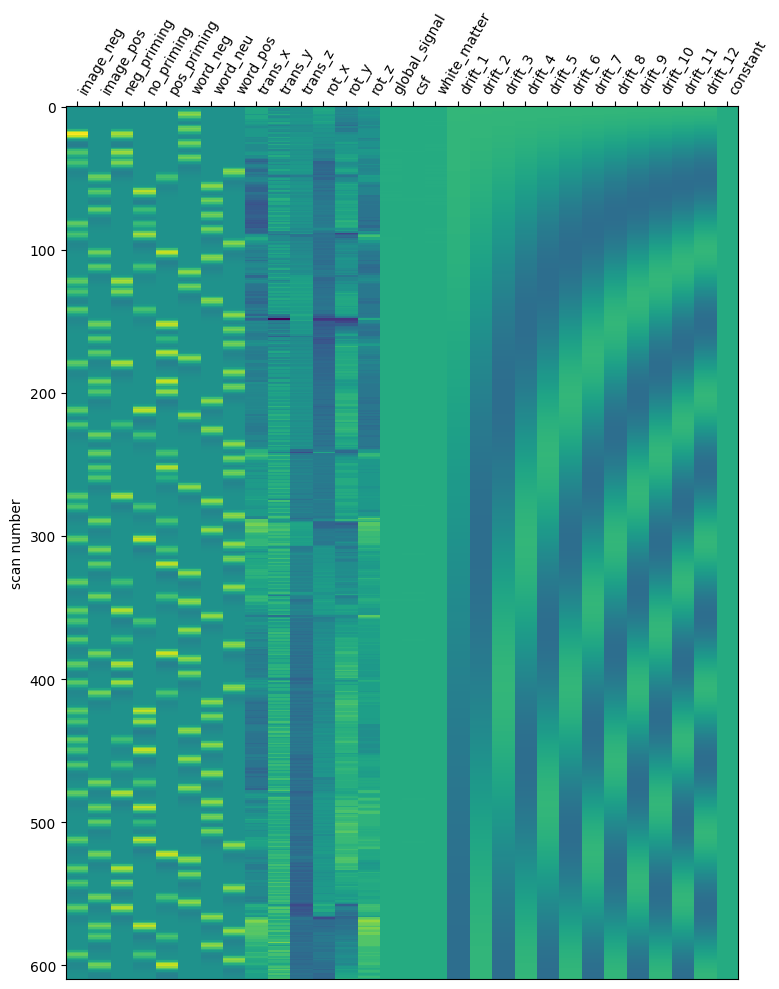

In [15]:
# Calculate design matrix
design_matrix = model1.design_matrices_[0]

# Plot the design matrix
plot_design_matrix(design_matrix)
plt.show()

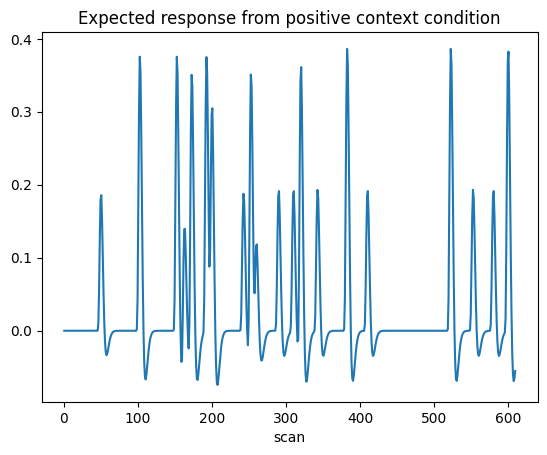

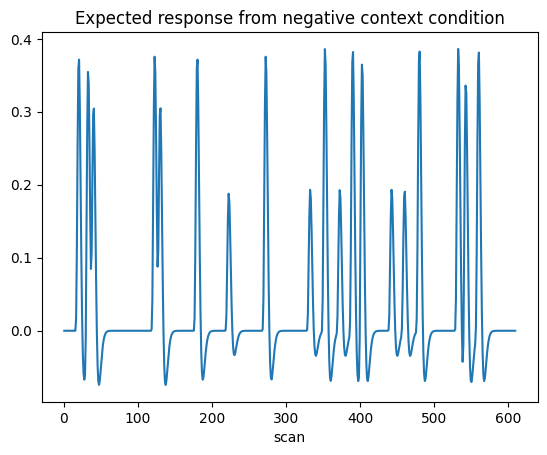

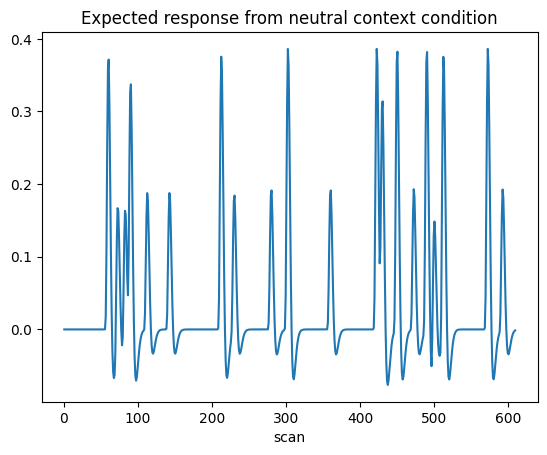

In [16]:
# Plot expected HRF signal timeseries for condition "pos_priming"
plt.plot(design_matrix['pos_priming'])
plt.xlabel('scan')
plt.title('Expected response from positive context condition')
plt.show()

# for condition "neg_priming"
plt.plot(design_matrix['neg_priming'])
plt.xlabel('scan')
plt.title('Expected response from negative context condition')
plt.show()

# for condition "no_priming"
plt.plot(design_matrix['no_priming'])
plt.xlabel('scan')
plt.title('Expected response from neutral context condition')
plt.show()

#### Contrasts

Contrasts are what we are actually interested in, i.e. testing whether there is a *difference* in the predicted response between conditions! This is tested statistically using `contrasts`.

Conrasts indicate whether trials of the specified condition/event (e.g. positive image) has any significant effect on the BOLD signal compared to the baseline (average) signal. 

Importantly, the contrast is tested for each voxel. That is, the result will be a 3D image with the beta-parameter of the difference for all voxels (zmap), and we can then evaluate which of the voxels survive the significance threshold and plot them - and these are the "areas" that showed a significant effect in BOLD response given our contrast. 

*Examples from below:*
- "image_pos" = contrast testing whether trials of the *image_pos* condition has any significant effect on the BOLD signal compared to the baseline signal. 
- Same with "image_neg" and "image_neu"
- + contrasts e.g. "image_pos + image_neg" = Contrast testing whether both trials mentioned any effect on teh BOLD signal compared to the baseline signal. 
- - contrasts e.g. "image_pos - image_neg" = testing whether one condtino has a different effect on the BOLD signal compared to the *string* condition (i.e., when we subtract the effects that occur in both conditions, what's left accounted for by the first condition). 


Remember that contrasts can be defined using using vectors or the names of of the conditions, specified in the events dataframe. Sum, subtraction and scalar multiplication are allowed.


- F-contrasts = effects of interest (computed in the compute_contrast function with argument stat_type = "F")
- T-contrasts = the contrasts between tasks (or task and resting condition)

= defined according to the design and purpose of the analysis.


Here: Testing difference btw predictable (neg/pos valenced) and neutral/unpredictable conditions

In [12]:
# Define t-contrast
contrasts = ["(pos_priming + neg_priming) - no_priming"]

# Plot them
#for contrast in contrasts:
 #   plot_contrast_matrix(contrast, design_matrix = design_matrix)

##### Significance threshold
To display the results, we will set a statistical threshold. Conventionally p<0.001, uncorrected for multiple comparisons has been used. 

NB: Uncorrected for multiple comparisons at this point

In [6]:
p001_unc = norm.isf(0.001)

#### Fit first-level model, compute contrast, plot for all subjects

Fitting a first-level model as specified above for each subject, computing the contrast and plotting the surviving voxels on both sagittal glass brains and axial stat maps on multiple image slices using the significance threshold defined above.

*NB: A ~2 h. run...*

/home/ucloud/.local/lib/python3.12/site-packages/nilearn/glm/first_level/experimental_paradigm.py:198: UserWarning: Duplicated events were detected. Amplitudes of these events will be summed. You might want to verify your inputs.
  warnings.warn(
/home/ucloud/.local/lib/python3.12/site-packages/nilearn/glm/first_level/experimental_paradigm.py:198: UserWarning: Duplicated events were detected. Amplitudes of these events will be summed. You might want to verify your inputs.
  warnings.warn(
/home/ucloud/.local/lib/python3.12/site-packages/nilearn/glm/first_level/experimental_paradigm.py:198: UserWarning: Duplicated events were detected. Amplitudes of these events will be summed. You might want to verify your inputs.
  warnings.warn(
/home/ucloud/.local/lib/python3.12/site-packages/nilearn/glm/first_level/experimental_paradigm.py:198: UserWarning: Duplicated events were detected. Amplitudes of these events will be summed. You might want to verify your inputs.
  warnings.warn(
/home/ucloud

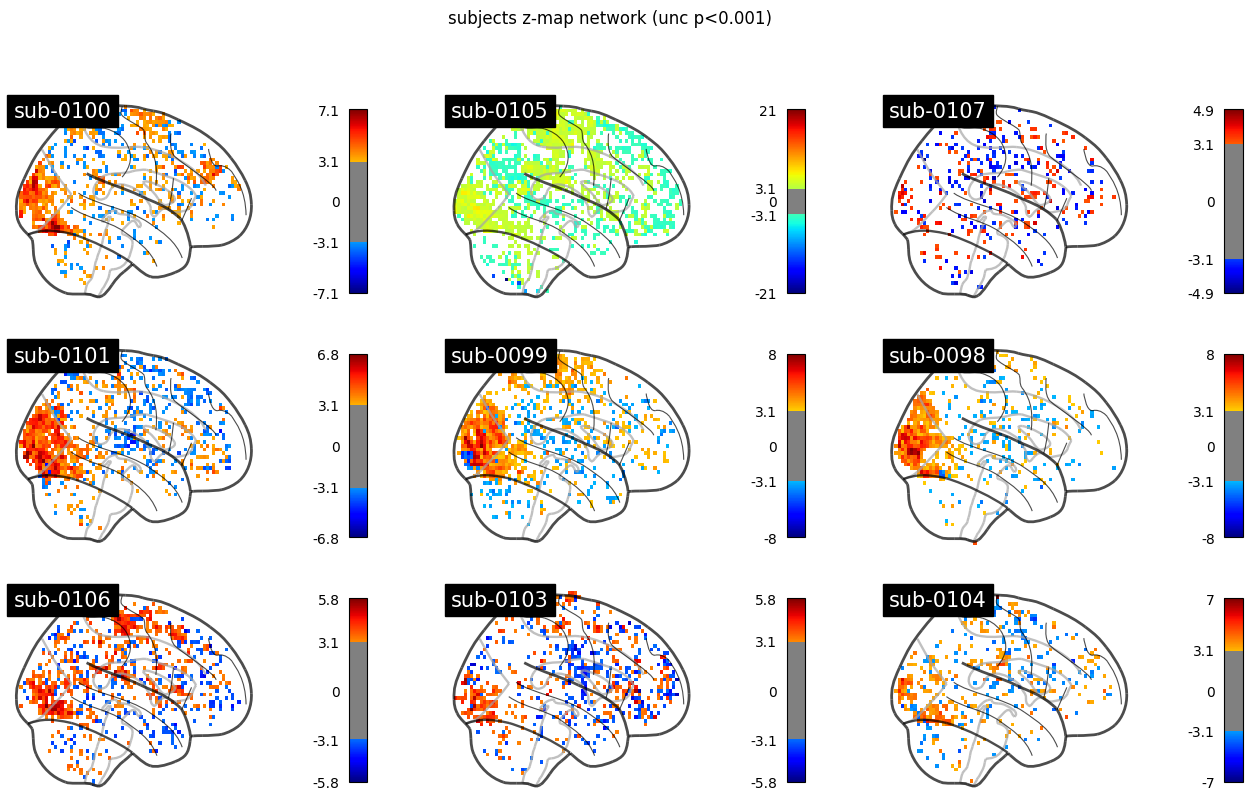

In [8]:
working_dir = '/work/NajaMølleLindelof#9704/CogNeuro24/Exam'
os.chdir(working_dir)
# Define directories to save reports and plots
report_dir = 'glm_reports'
plot_dir = os.path.join(report_dir, 'plots')


model_and_args = zip(models3, models_run_imgs3, models_events3, models_confounds3)
zmap_list = []

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 9))

# Loop through each subject's model object 
for m_idx, (model, imgs, events, confounds) in enumerate(model_and_args): 
    # fit the model passing the corresponding model object, img files, event files and confounds files 
    model.fit(imgs, events, confounds)
    # compute contrast and output z map
    zmap = model.compute_contrast(contrasts, output_type='z_score')
    zmap_list.append(zmap)

    # plot each threshold analysis, i.e. first-level zmap for each subject on glass brain (using p001_unc threshold)
    plotting.plot_glass_brain(zmap, cmap='jet',colorbar=True, threshold=p001_unc,
                              title=('sub-' + model.subject_label),
                              axes=axes[int(m_idx / 3), int(m_idx % 3)],
                              plot_abs=False, display_mode='x')

    
    # Generate GLM report
    #report = make_glm_report(model=model, contrasts=contrasts, bg_img = mean_img(imgs), threshold = p001_unc)
    
    # Save the report as an HTML file
    #report_filename = os.path.join(report_dir, f'sub-{model.subject_label}_glm_report.html')
    #report.save_as_html(report_filename)
    #print(f'Report saved as {report_filename}')

    
fig.suptitle('subjects z-map network (unc p<0.001)')
plotting.show()

/home/ucloud/.local/lib/python3.12/site-packages/nilearn/glm/first_level/experimental_paradigm.py:198: UserWarning: Duplicated events were detected. Amplitudes of these events will be summed. You might want to verify your inputs.
  warnings.warn(
/home/ucloud/.local/lib/python3.12/site-packages/nilearn/glm/first_level/first_level.py:707: UserWarning: Mean values of 0 observed. The data have probably been centered.Scaling might not work as expected
  Y, _ = mean_scaling(Y, self.signal_scaling)
/home/ucloud/.local/lib/python3.12/site-packages/nilearn/glm/first_level/experimental_paradigm.py:198: UserWarning: Duplicated events were detected. Amplitudes of these events will be summed. You might want to verify your inputs.
  warnings.warn(
/home/ucloud/.local/lib/python3.12/site-packages/nilearn/glm/first_level/first_level.py:707: UserWarning: Mean values of 0 observed. The data have probably been centered.Scaling might not work as expected
  Y, _ = mean_scaling(Y, self.signal_scaling)
/hom

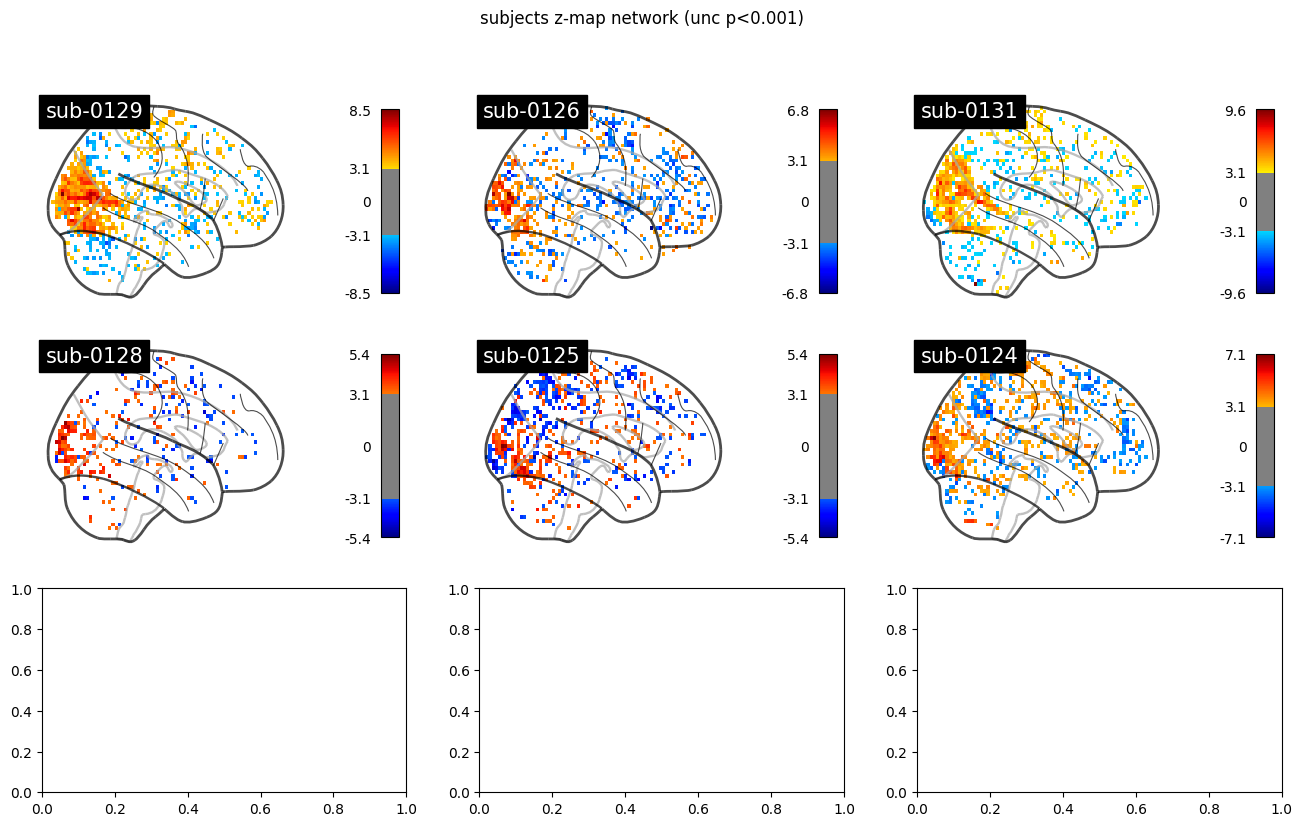

In [9]:
working_dir = '/work/NajaMølleLindelof#9704/CogNeuro24/Exam'
os.chdir(working_dir)
# Define directories to save reports and plots
report_dir = 'glm_reports'
plot_dir = os.path.join(report_dir, 'plots')


model_and_args = zip(models4, models_run_imgs4, models_events4, models_confounds4)
zmap_list = []

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 9))

# Loop through each subject's model object 
for m_idx, (model, imgs, events, confounds) in enumerate(model_and_args): 
    # fit the model passing the corresponding model object, img files, event files and confounds files 
    model.fit(imgs, events, confounds)
    # compute contrast and output z-map
    zmap = model.compute_contrast(contrasts, output_type='z_score')
    zmap_list.append(zmap)
    
    # plot each threshold analysis, i.e. first-level zmap for each subject on glass brain (using p001_unc threshold)
    plotting.plot_glass_brain(zmap, cmap='jet',colorbar=True, threshold=p001_unc,
                              title=('sub-' + model.subject_label),
                              axes=axes[int(m_idx / 3), int(m_idx % 3)],
                              plot_abs=False, display_mode='x')

    # Generate GLM report
    #report = make_glm_report(model=model, contrasts=contrasts, bg_img = mean_img(imgs), threshold = p001_unc)
    
    # Save the report as an HTML file
    #report_filename = os.path.join(report_dir, f'sub-{model.subject_label}_glm_report.html')
    #report.save_as_html(report_filename)
    #print(f'Report saved as {report_filename}')

fig.suptitle('subjects z-map network (unc p<0.001)')
plotting.show()

#### Save FL model results

Using pickles library to save model objects and arguments.

In [11]:
# Save first-level model objects using pickle
f = open("/work/NajaMølleLindelof#9704/CogNeuro24/Exam/FL_models/FL_models_full.pkl", "wb")
pickle.dump([models3+models4, models_run_imgs3+models_run_imgs4, models_events3+models_events4, models_confounds3+models_confounds4], f)
f.close()

In [2]:
# To load and use the saved first-level model objects 
fl_obj = pd.read_pickle("/work/NajaMølleLindelof#9704/CogNeuro24/Exam/FL_models/FL_models_full.pkl")
fl_models = fl_obj[0] #Models are in the first item
second_level_input = fl_models

### Second-level analysis - group model estimation

Investigating the degree of overlap in the data with the first-level contrast estimates for each individual participant will enter as data in a new statistical test.

ALl first-level subjects share similar desgin matrix - implemented directly in second-level model.

Modelling the group-level as an intercept model, i.e. with a common intercept for all aprticipant without modelling variation within subgroups (e.g. age, gender etc)
- Performing spatial smoothing with Gaussian kernel with fhwm of 8 mm - reducing noise across subjects.

Compute group-level contrast (with the contrast specified for the first-level contrasting above), still estimating the contrast effect across all subjects (for the common intercept)



In [3]:

# Add first-level model estimates as second-level input --> or use saved files
#second_level_input = models3 + models4 

# Define second-level design matrix; here an intercept model (not estimating variation among sub-groups)
design_matrix = pd.DataFrame(
    [1] * len(second_level_input),
    columns=['intercept'],
)

# Define model and add the smoothing parameter
second_level_model = SecondLevelModel(smoothing_fwhm = 8.0)
second_level_model = second_level_model.fit(second_level_input, design_matrix=design_matrix)


/home/ucloud/.local/lib/python3.12/site-packages/nilearn/glm/second_level/second_level.py:361: UserWarning: One contrast given, assuming it for all 6 runs
  sample_map = sample_model.compute_contrast(


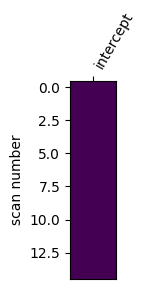

In [9]:
# Plot second-level design matrix
plot_design_matrix(design_matrix)
plt.show()

In [13]:
# Scaling contrast giving equal weight to conditions being compared
scaled_contrasts = ["1/2*pos_priming + 1/2*neg_priming - no_priming"]

# Compute second-level contrast z-map, using contrast defined for firt-level analysis above
zmap_group_scaled = second_level_model.compute_contrast(
    first_level_contrast = scaled_contrasts)

zmap_group = second_level_model.compute_contrast(
    first_level_contrast = contrasts)


/home/ucloud/.local/lib/python3.12/site-packages/nilearn/glm/second_level/second_level.py:307: UserWarning: One contrast given, assuming it for all 6 runs
  effect_map = model.compute_contrast(
/home/ucloud/.local/lib/python3.12/site-packages/nilearn/glm/second_level/second_level.py:307: UserWarning: One contrast given, assuming it for all 6 runs
  effect_map = model.compute_contrast(
/home/ucloud/.local/lib/python3.12/site-packages/nilearn/glm/second_level/second_level.py:307: UserWarning: One contrast given, assuming it for all 6 runs
  effect_map = model.compute_contrast(
/home/ucloud/.local/lib/python3.12/site-packages/nilearn/glm/second_level/second_level.py:307: UserWarning: One contrast given, assuming it for all 6 runs
  effect_map = model.compute_contrast(
/home/ucloud/.local/lib/python3.12/site-packages/nilearn/glm/second_level/second_level.py:307: UserWarning: One contrast given, assuming it for all 6 runs
  effect_map = model.compute_contrast(
/home/ucloud/.local/lib/python

Group-level effects plotted on glass brain and stat map using uncorrected *p* < .001 threshold.


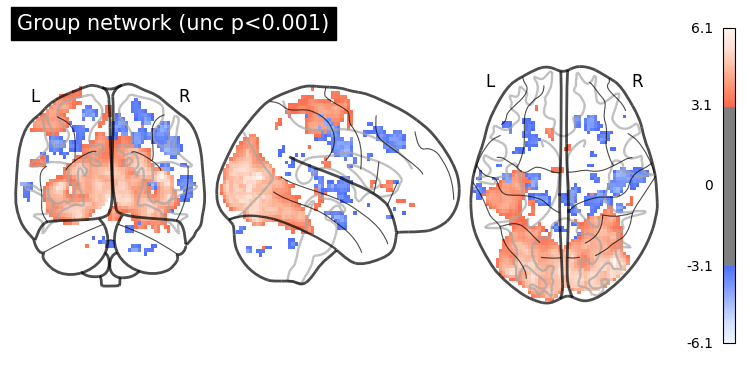

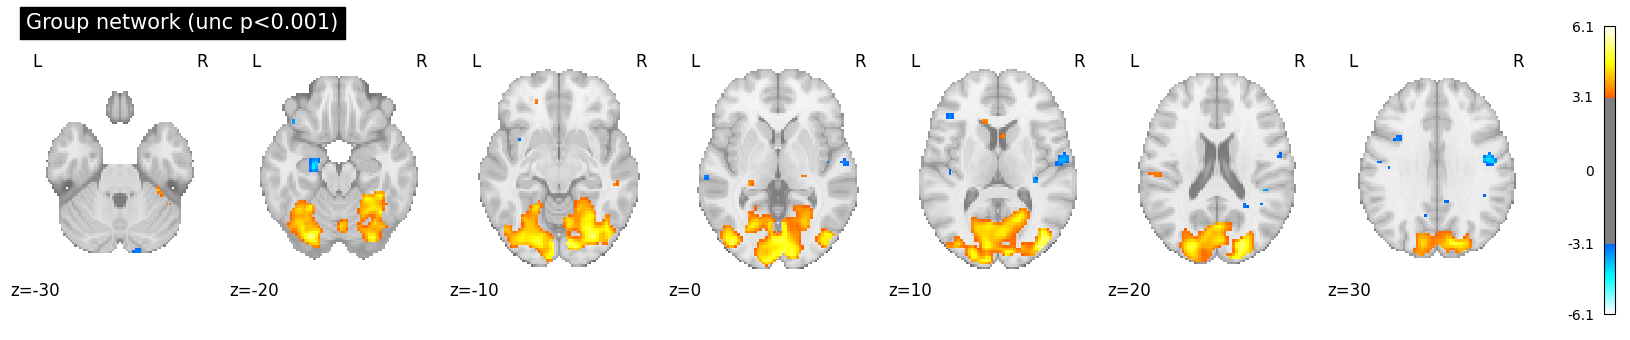

In [14]:
# Plot uncorrected images on glass brain and statmap (using p001_unc threshold)
plotting.plot_glass_brain(zmap_group, cmap='blue_red',colorbar=True, threshold=p001_unc,
                          title='Group network (unc p<0.001)',
                          plot_abs=False)
plt.show()

plot_stat_map(zmap_group, cmap='cold_hot',threshold=p001_unc, cut_coords=[-30,-20,-10,0,10,20,30],
              display_mode='z', black_bg=False,
              title='Group network (unc p<0.001)')
plt.show()

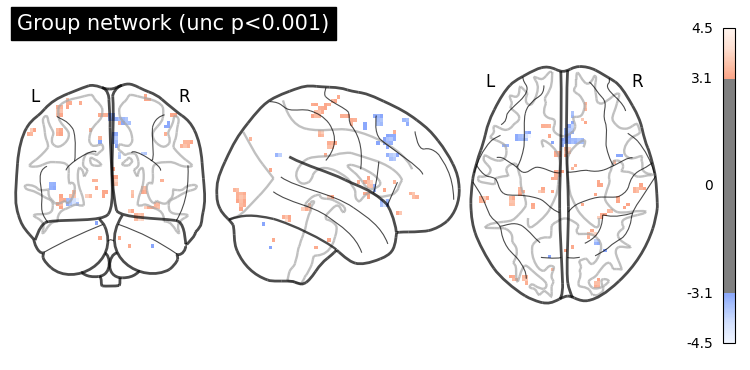

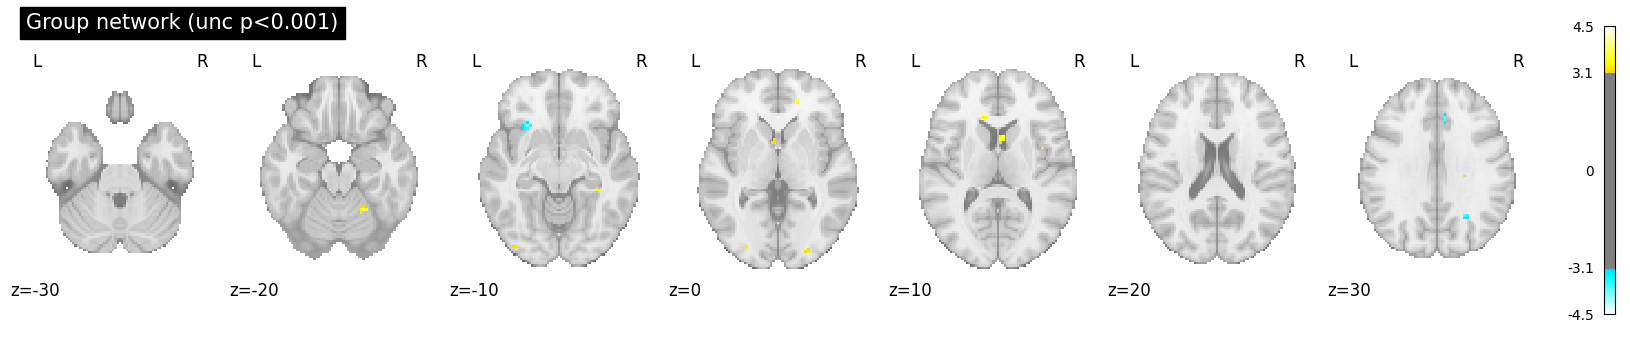

In [7]:
# Plot uncorrected images on glass brain and statmap (using p001_unc threshold)
plotting.plot_glass_brain(zmap_group_scaled, cmap='blue_red',colorbar=True, threshold=p001_unc,
                          title='Group network (unc p<0.001)',
                          plot_abs=False)
plt.show()

plot_stat_map(zmap_group_scaled, cmap='cold_hot',threshold=p001_unc, cut_coords=[-30,-20,-10,0,10,20,30],
              display_mode='z', black_bg=False,
              title='Group network (unc p<0.001)')
plt.show()

### Correcting for multiple comparisons 
fMRI analysis yields a large amount of statistical tests, called multiple omparisons, because regression analysis is performed on each individual voxel over time for individual subjects. Multiple comparisons entail an increase in the chance of obtaining false-positives significant results.

Therefore, correcting for multiple comparisons is critically important for ensuring the robustness of reported results. 

Here, I perform non-parametric permutation tests with 10.000 permuations and a corrected *p*-value of .05.


Following the `06_fMRI_analysis.ipynb` tutorial.


/home/ucloud/.local/lib/python3.12/site-packages/nilearn/glm/second_level/second_level.py:361: UserWarning: One contrast given, assuming it for all 6 runs
  sample_map = sample_model.compute_contrast(
/home/ucloud/.local/lib/python3.12/site-packages/nilearn/glm/second_level/second_level.py:307: UserWarning: One contrast given, assuming it for all 6 runs
  effect_map = model.compute_contrast(
/home/ucloud/.local/lib/python3.12/site-packages/nilearn/glm/second_level/second_level.py:307: UserWarning: One contrast given, assuming it for all 6 runs
  effect_map = model.compute_contrast(
/home/ucloud/.local/lib/python3.12/site-packages/nilearn/glm/second_level/second_level.py:307: UserWarning: One contrast given, assuming it for all 6 runs
  effect_map = model.compute_contrast(
/home/ucloud/.local/lib/python3.12/site-packages/nilearn/glm/second_level/second_level.py:307: UserWarning: One contrast given, assuming it for all 6 runs
  effect_map = model.compute_contrast(
/home/ucloud/.local/lib

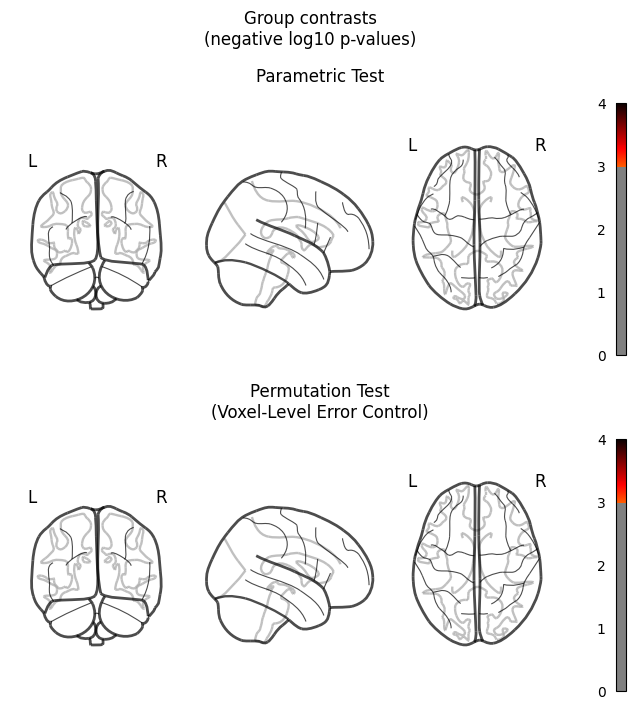

In [11]:

## Non-parametric permutation test SCALED
# n_perm=1000 for the sake of time. Ideally, this should be 10,000, but the upper limit on permutations is 2 to the power of N.
n_perm = 10000

# Perform permutation
out_dict = non_parametric_inference(
    second_level_input,
    design_matrix=design_matrix,
    first_level_contrast=scaled_contrasts,
    model_intercept=True,
    n_perm=n_perm,  
    two_sided_test=False,
    smoothing_fwhm=8.0,
    n_jobs=1,
)


## Plot non-parametric permutation map 

# Prepare thresholds for plotting
threshold_log = round(-np.log10(1 / 20))  # p < 0.05 
# minimal p-value possible with the number of permuations
vmax = round(-np.log10(1 / n_perm)) 
# Get the number of voxels in the image
n_voxels = np.sum(get_data(second_level_model.masker_.mask_img_))
# Get an image of p-values 
p_val = second_level_model.compute_contrast(first_level_contrast = scaled_contrasts, output_type='p_value')

cut_coords = [0]

# Making an image with significant values, correcting the p-values for multiple testing and taking negative logarithm
neg_log_pval = math_img(
    '-np.log10(np.minimum(1, img * {}))'.format(str(n_voxels)),
    img=p_val,
)

# Prepare images to plot
IMAGES = [
    neg_log_pval,
    out_dict
]
TITLES = [
    'Parametric Test',
    'Permutation Test\n(Voxel-Level Error Control)',
]

# Make loop with plots
fig, axes = plt.subplots(figsize=(8, 8), nrows=2, ncols=1)
img_counter = 0
i_row=0
for j_row in range(2):
        ax = axes[j_row]     
        plotting.plot_glass_brain(
            IMAGES[img_counter],
            colorbar=True,
            vmax=vmax,
            plot_abs=False,
            cut_coords=cut_coords,
            threshold=threshold_log,
            figure=fig,
            axes=ax,
        )

        ax.set_title(TITLES[img_counter])
        img_counter += 1

fig.suptitle('Group contrasts\n(negative log10 p-values)')
plt.show()


/home/ucloud/.local/lib/python3.12/site-packages/nilearn/glm/second_level/second_level.py:361: UserWarning: One contrast given, assuming it for all 6 runs
  sample_map = sample_model.compute_contrast(


/home/ucloud/.local/lib/python3.12/site-packages/nilearn/glm/second_level/second_level.py:307: UserWarning: One contrast given, assuming it for all 6 runs
  effect_map = model.compute_contrast(
/home/ucloud/.local/lib/python3.12/site-packages/nilearn/glm/second_level/second_level.py:307: UserWarning: One contrast given, assuming it for all 6 runs
  effect_map = model.compute_contrast(
/home/ucloud/.local/lib/python3.12/site-packages/nilearn/glm/second_level/second_level.py:307: UserWarning: One contrast given, assuming it for all 6 runs
  effect_map = model.compute_contrast(
/home/ucloud/.local/lib/python3.12/site-packages/nilearn/glm/second_level/second_level.py:307: UserWarning: One contrast given, assuming it for all 6 runs
  effect_map = model.compute_contrast(
/home/ucloud/.local/lib/python3.12/site-packages/nilearn/glm/second_level/second_level.py:307: UserWarning: One contrast given, assuming it for all 6 runs
  effect_map = model.compute_contrast(
/home/ucloud/.local/lib/python

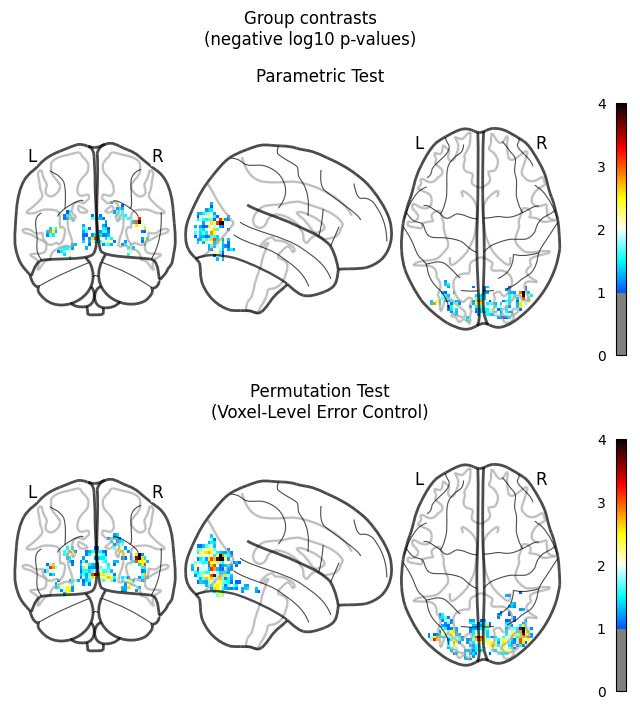

In [14]:

## Non-parametric permutation test NONSCALED
# n_perm=1000 for the sake of time. Ideally, this should be 10,000, but the upper limit on permutations is 2 to the power of N.
n_perm = 10000

# Perform permutation
out_dict = non_parametric_inference(
    second_level_input,
    design_matrix=design_matrix,
    first_level_contrast=contrasts,
    model_intercept=True,
    n_perm=n_perm,  
    two_sided_test=False,
    smoothing_fwhm=8.0,
    n_jobs=1,
)


## Plot non-parametric permutation map 

# Prepare thresholds for plotting
threshold_log = round(-np.log10(1 / 20))  # p < 0.05 
# minimal p-value possible with the number of permuations
vmax = round(-np.log10(1 / n_perm)) 
# Get the number of voxels in the image
n_voxels = np.sum(get_data(second_level_model.masker_.mask_img_))
# Get an image of p-values 
p_val = second_level_model.compute_contrast(first_level_contrast = contrasts, output_type='p_value')

cut_coords = [0]

# Making an image with significant values, correcting the p-values for multiple testing and taking negative logarithm
neg_log_pval = math_img(
    '-np.log10(np.minimum(1, img * {}))'.format(str(n_voxels)),
    img=p_val,
)

# Prepare images to plot
IMAGES = [
    neg_log_pval,
    out_dict
]
TITLES = [
    'Parametric Test',
    'Permutation Test\n(Voxel-Level Error Control)',
]

# Make loop with plots
fig, axes = plt.subplots(figsize=(8, 8), nrows=2, ncols=1)
img_counter = 0
i_row=0
for j_row in range(2):
        ax = axes[j_row]     
        plotting.plot_glass_brain(
            IMAGES[img_counter],
            colorbar=True,
            vmax=vmax,
            plot_abs=False,
            cut_coords=cut_coords,
            threshold=threshold_log,
            figure=fig,
            axes=ax,
        )

        ax.set_title(TITLES[img_counter])
        img_counter += 1

fig.suptitle('Group contrasts\n(negative log10 p-values)')
plt.show()


### Inspect clusters on brain Atlas: Neuroanatomical cluster analysis
In order to investigate which brain regions the active clusters in the data covers, a neuroanatoical cluster analysis was applied to the corrected group-level z-map. The `atlasreader` package automatically applies a brain atlas to the data (possible bcs of normalisation to MNI space) and provides additional information on the clusters as well.

The cluster extent is defined as min. 5 contiguous voxels.

In [24]:
output_dir = "2ndl_glm_results/"

# Create output function
create_output(
    filename = out_dict,
    atlas='default',
    #voxel_thresh=1.96,
    voxel_thresh=threshold_log,
    direction='both',
    cluster_extent=5, # number of voxels defined as clusters
    glass_plot_kws = {'black_bg':True,'vmax':20,'colorbar':True, 'cmap': 'jet'},
    stat_plot_kws = {'black_bg':True,'cmap': 'jet','title':False},
    outdir=output_dir
    )


# With other correction methods
   # filename = thresholded_map2,
    #voxel_thresh=threshold2,

Defaulting to user installation because normal site-packages is not writeable


,cluster_id,peak_x,peak_y,peak_z,peak_value,volume_mm,aal,desikan_killiany,harvard_oxford
0,1.0,-0.511999,-81.980000,-3.5,3.301073,4421.808655,Calcarine_L,ctx-lh-lingual,55.0% Left_Lingual_Gyrus; 12.0% Right_Lingual_...
1,2.0,39.904001,-76.927999,11.5,4.000043,4287.814453,Occipital_Mid_R,Right-Cerebral-White-Matter,32.0% Right_Lateral_Occipital_Cortex_superior_...
2,3.0,-23.245999,-76.927999,-18.5,2.585070,1933.344910,Cerebelum_6_L,Unknown,44.0% Left_Occipital_Fusiform_Gyrus; 6.0% Left...
3,4.0,-0.511999,-79.454000,14.5,2.207652,1397.368103,Calcarine_L,ctx-lh-cuneus,40.0% Left_Supracalcarine_Cortex; 25.0% Left_I...
4,5.0,-23.245999,-87.032000,17.5,2.769594,1263.373901,Occipital_Mid_L,Left-Cerebral-White-Matter,46.0% Left_Lateral_Occipital_Cortex_superior_d...


,cluster_id,peak_x,peak_y,peak_z,cluster_mean,volume_mm,aal,desikan_killiany,harvard_oxford
0,1.0,-0.511999,-81.980000,-3.5,1.560655,4421.808655,38.53% Calcarine_L; 26.41% Lingual_R; 19.48% C...,25.54% Right-Cerebral-White-Matter; 16.45% Lef...,29.44% Right_Lingual_Gyrus; 24.68% Left_Occipi...
1,2.0,39.904001,-76.927999,11.5,1.667063,4287.814453,49.11% Occipital_Mid_R; 35.27% Occipital_Sup_R...,54.91% Right-Cerebral-White-Matter; 27.23% ctx...,37.05% Right_Lateral_Occipital_Cortex_superior...
2,3.0,-23.245999,-76.927999,-18.5,1.530699,1933.344910,56.44% Fusiform_L; 17.82% Lingual_L; 12.87% Oc...,36.63% ctx-lh-fusiform; 27.72% Left-Cerebral-W...,96.04% Left_Occipital_Fusiform_Gyrus
3,4.0,-0.511999,-79.454000,14.5,1.309741,1397.368103,42.47% Calcarine_L; 31.51% Calcarine_R; 26.03%...,26.03% ctx-rh-cuneus; 20.55% ctx-lh-cuneus; 15...,28.77% Right_Intracalcarine_Cortex; 23.29% Rig...
4,5.0,-23.245999,-87.032000,17.5,1.524987,1263.373901,93.94% Occipital_Mid_L,56.06% Left-Cerebral-White-Matter; 31.82% ctx-...,51.52% Left_Occipital_Pole; 48.48% Left_Latera...


In [34]:
## Inspect cluster information

# Info about cluster peaks
peak_info_emo_baseline = pd.read_csv(os.path.join(output_dir, 'atlasreader_peaks.csv'))
display(peak_info_emo_baseline)

# Info about cluster extent and ROI
cluster_info_emo_baseline = pd.read_csv(os.path.join(output_dir, 'atlasreader_clusters.csv'))
display(cluster_info_emo_baseline)


,cluster_id,peak_x,peak_y,peak_z,cluster_mean,volume_mm,aal,desikan_killiany,harvard_oxford
0,1.0,-0.511999,-81.980000,-3.5,1.560655,4421.808655,38.53% Calcarine_L; 26.41% Lingual_R; 19.48% C...,25.54% Right-Cerebral-White-Matter; 16.45% Lef...,29.44% Right_Lingual_Gyrus; 24.68% Left_Occipi...
1,2.0,39.904001,-76.927999,11.5,1.667063,4287.814453,49.11% Occipital_Mid_R; 35.27% Occipital_Sup_R...,54.91% Right-Cerebral-White-Matter; 27.23% ctx...,37.05% Right_Lateral_Occipital_Cortex_superior...
2,3.0,-23.245999,-76.927999,-18.5,1.530699,1933.344910,56.44% Fusiform_L; 17.82% Lingual_L; 12.87% Oc...,36.63% ctx-lh-fusiform; 27.72% Left-Cerebral-W...,96.04% Left_Occipital_Fusiform_Gyrus
3,4.0,-0.511999,-79.454000,14.5,1.309741,1397.368103,42.47% Calcarine_L; 31.51% Calcarine_R; 26.03%...,26.03% ctx-rh-cuneus; 20.55% ctx-lh-cuneus; 15...,28.77% Right_Intracalcarine_Cortex; 23.29% Rig...
4,5.0,-23.245999,-87.032000,17.5,1.524987,1263.373901,93.94% Occipital_Mid_L,56.06% Left-Cerebral-White-Matter; 31.82% ctx-...,51.52% Left_Occipital_Pole; 48.48% Left_Latera...
5,6.0,29.800001,-81.980000,-15.5,1.589652,937.959412,67.35% Fusiform_R; 22.45% Occipital_Inf_R,30.61% ctx-rh-lateraloccipital; 28.57% ctx-rh-...,97.96% Right_Occipital_Fusiform_Gyrus
6,7.0,-40.927999,-84.506000,2.5,1.807734,459.408691,91.67% Occipital_Mid_L; 8.33% Occipital_Inf_L,75.00% Left-Cerebral-White-Matter; 25.00% ctx-...,100.00% Left_Lateral_Occipital_Cortex_inferior...
7,8.0,-5.563999,-69.349999,5.5,1.228231,229.704346,75.00% Lingual_L; 25.00% Calcarine_L,50.00% ctx-lh-lingual; 25.00% ctx-rh-cuneus; 2...,58.33% Left_Lingual_Gyrus; 33.33% Left_Intraca...
8,9.0,29.800001,-51.667999,-15.5,1.254578,153.136230,100.00% Fusiform_R,87.50% ctx-rh-fusiform; 12.50% Right-Cerebral-...,100.00% Right_Temporal_Occipital_Fusiform_Cortex


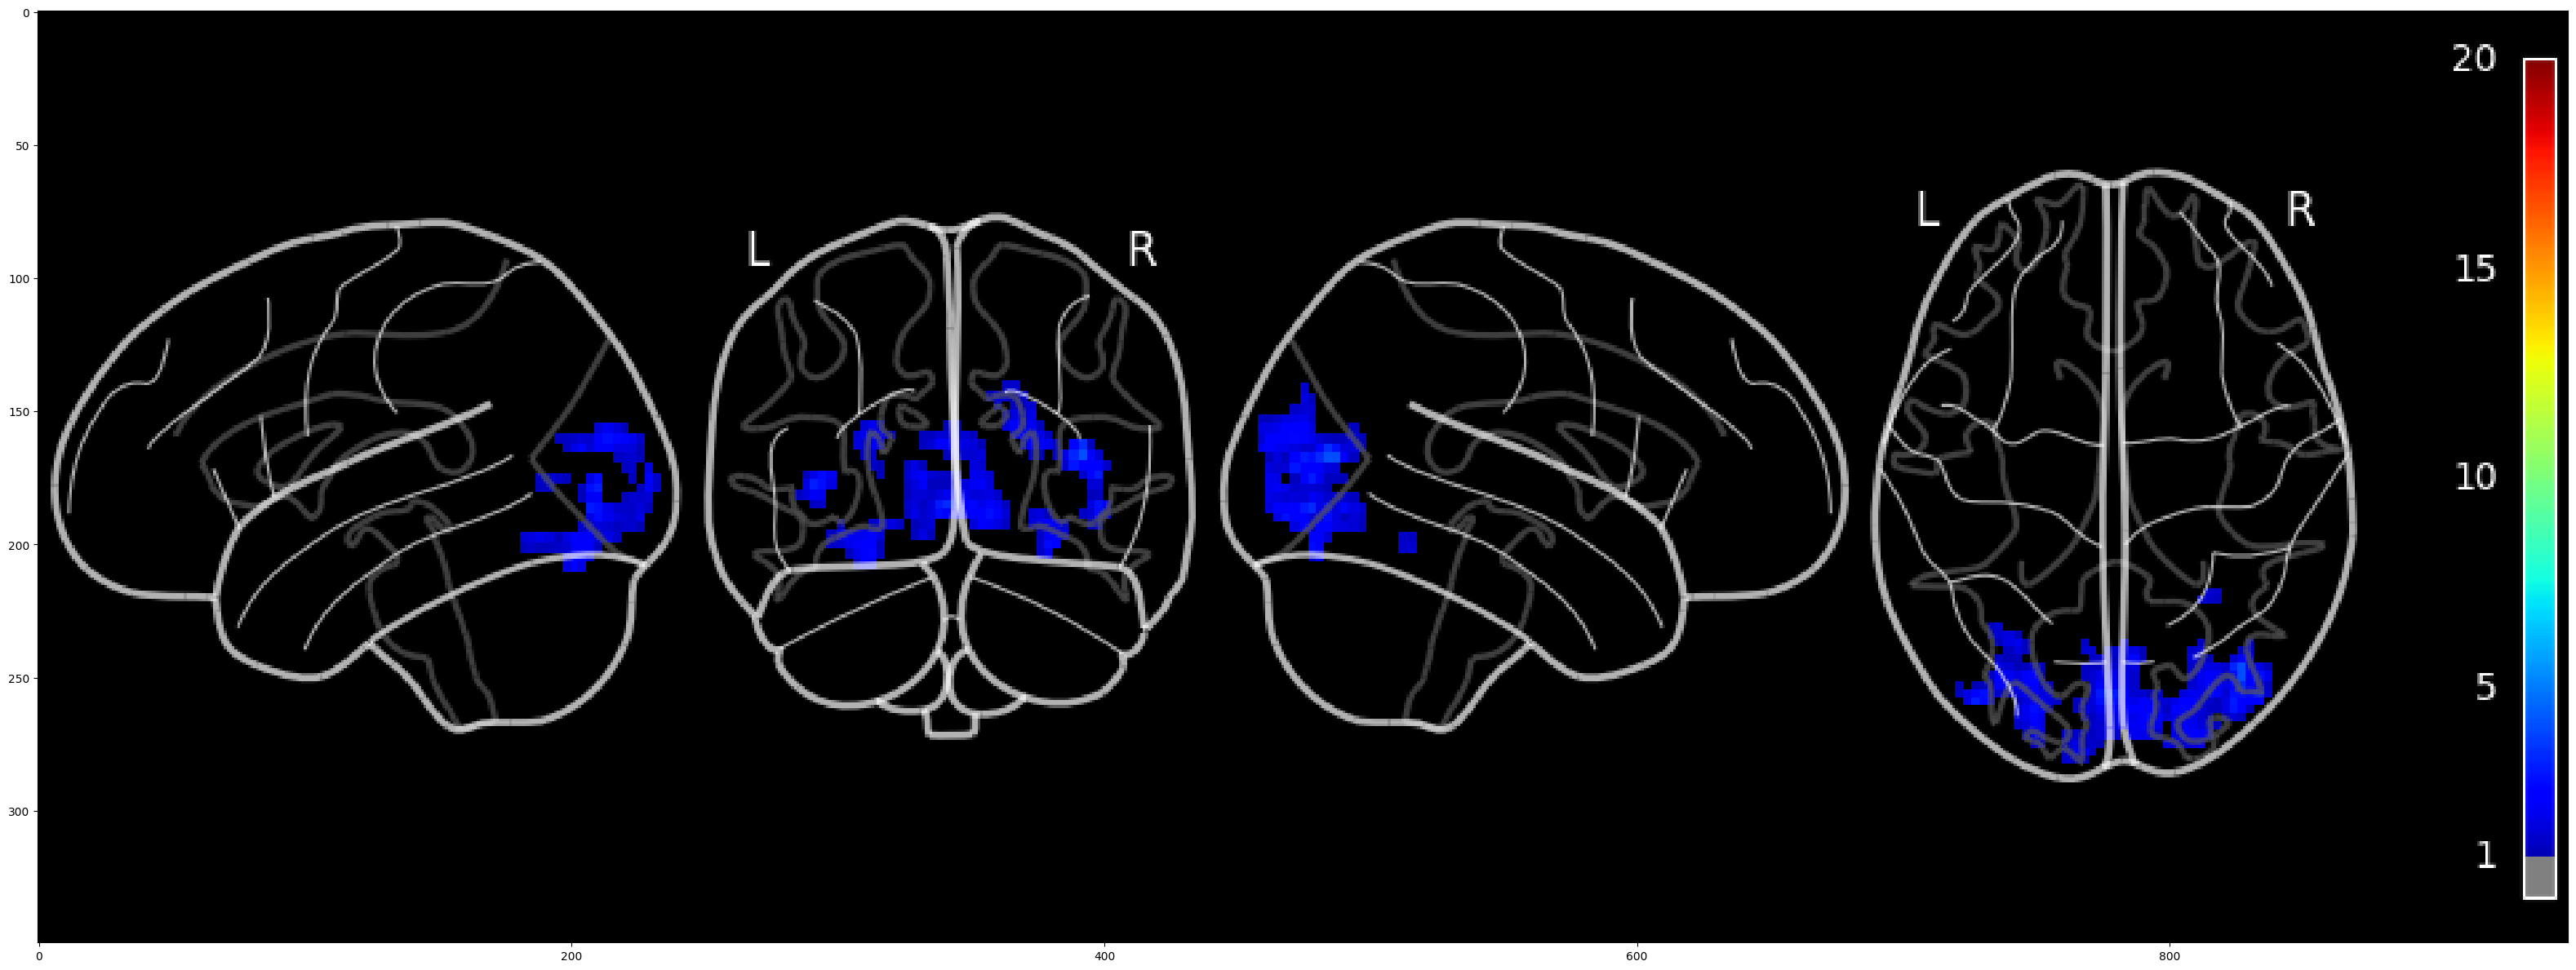

In [33]:
# read images
img_A = mpimg.imread(os.path.join(output_dir, 'atlasreader.png'))
plt.imshow(img_A)


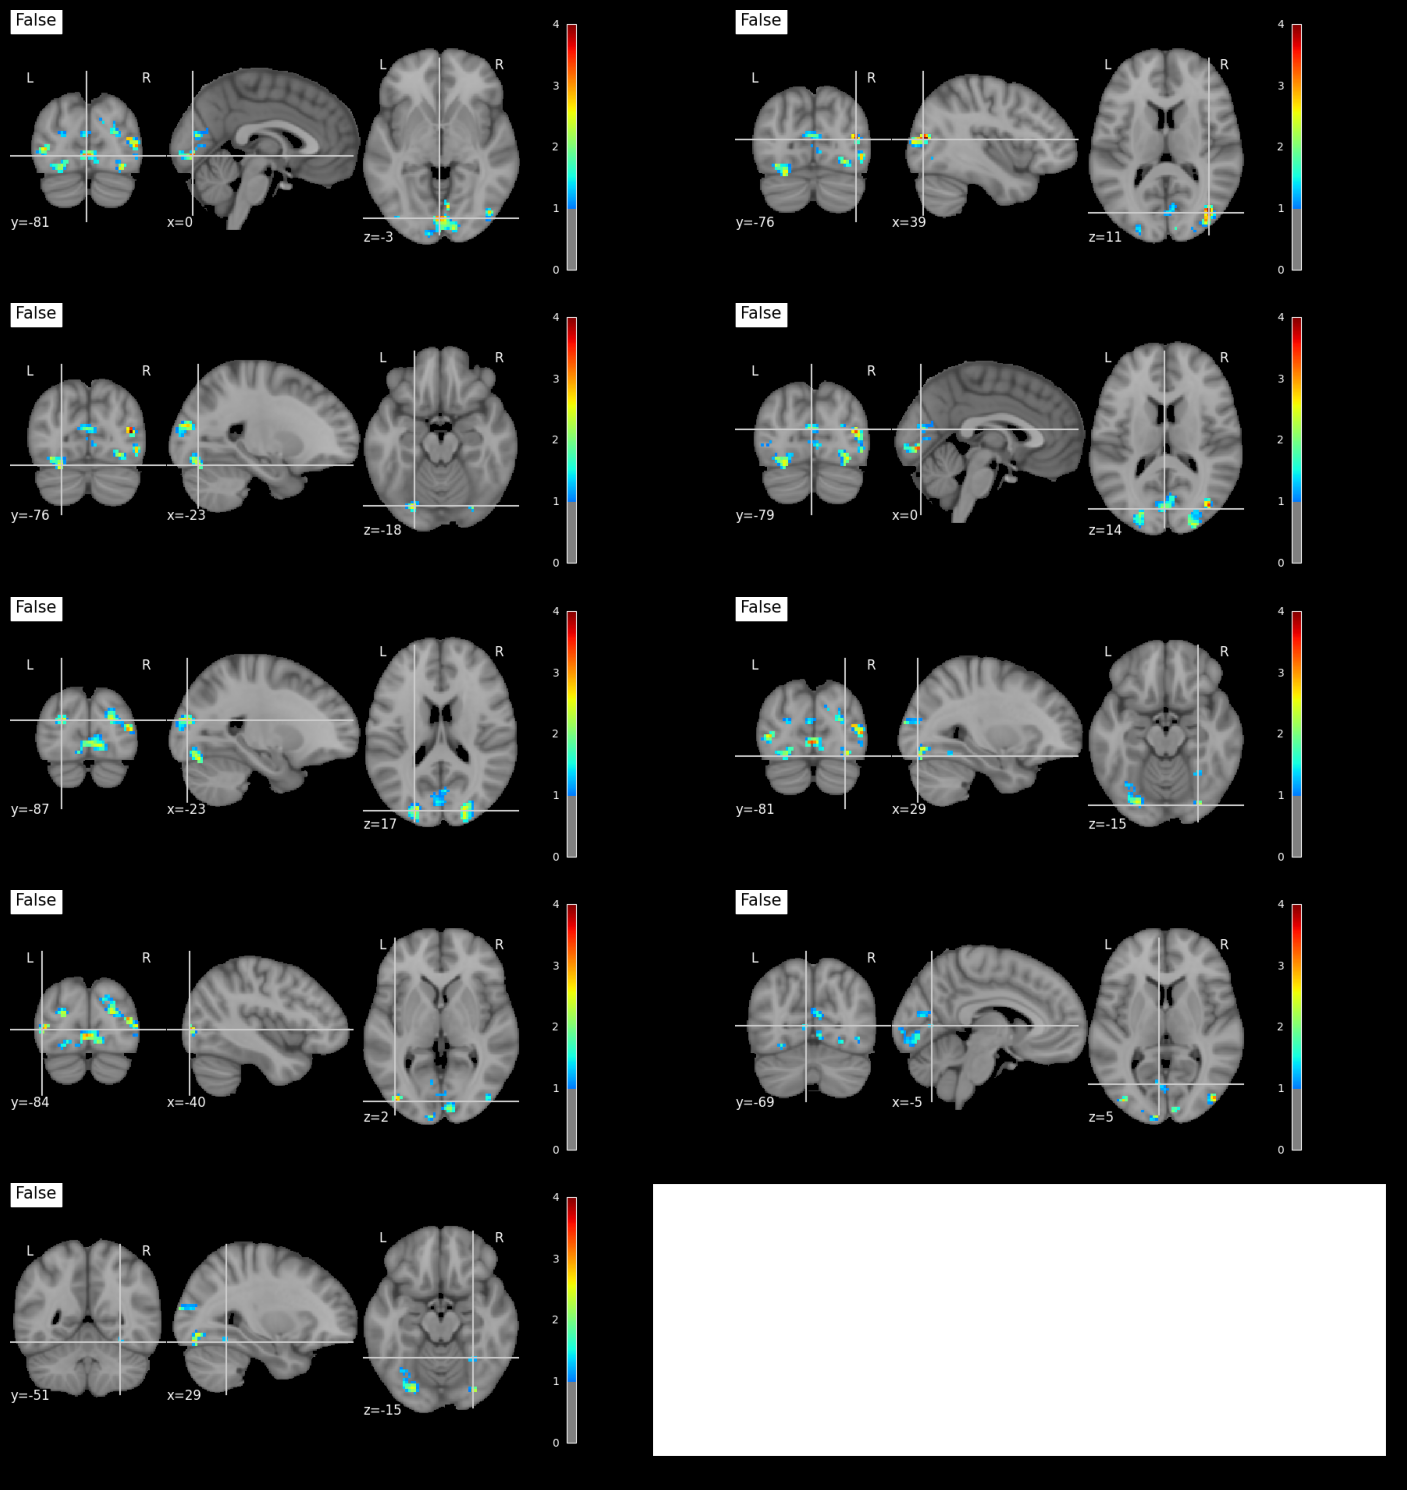

In [29]:
## Plot all clusters in one plot

# Image filenames
image_filenames = [
    'atlasreader_cluster01.png',
    'atlasreader_cluster02.png',
    'atlasreader_cluster03.png',
    'atlasreader_cluster04.png',
    'atlasreader_cluster05.png',
    'atlasreader_cluster06.png',
    'atlasreader_cluster07.png',
    'atlasreader_cluster08.png',
    "atlasreader_cluster09.png"
]

images = [mpimg.imread(os.path.join("2ndl_glm_results/", fname)) for fname in image_filenames]
fig, axes = plt.subplots(5, 2, figsize=(15, 15))
fig.patch.set_facecolor('black')
axes = axes.flatten()
for ax, img in zip(axes, images):
    ax.imshow(img)
    ax.axis('off')  # Hide the axes

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

## Behavioural analysis

See R.

## BTS - additional things tried

##### FDR and FWER corrections (Chen et al., 2017)
1. FDR (false-discovery rate) correction 
- expected proportion of incorrectly rejected H0 among all rejections
- too lenient a measure
2. FWER (family-wise error rate) correction 
- the probability of incorrectly rejecting at least one H0
- too strict


In [ ]:
## Correction thresholds
# FDR-correction with alpha=0.05
thresholded_map2, threshold2 = threshold_stats_img(
    zmap_group, alpha=.05, height_control='fdr')
print('The FDR=.05 threshold is %.3g' % threshold2)

# FWE/Bonferonni-correction wtih alpha=0.05 
thresholded_map3, threshold3 = threshold_stats_img(
    zmap_group, alpha=.05, height_control='bonferroni')
print('The p<.05 Bonferroni-corrected threshold is %.3g' % threshold3)


## Plot corrected group-level glass brain and statmap
# Plot FDR-corrected image 
plotting.plot_glass_brain(thresholded_map2, cmap='blue_red',colorbar=True, threshold=threshold2,
                          title='Group network (expected fdr p=0.05)',
                          plot_abs=False)
plt.show()

plot_stat_map(thresholded_map2, cmap='cold_hot', threshold=threshold2,cut_coords=[-30,-20,-10,0,10,20,30],
              display_mode='z',  black_bg=False,
              title='Group network (expected fdr p=0.05)')
plt.show()

# Plot bonferroni correction (FWER)
plotting.plot_glass_brain(thresholded_map3, cmap='blue_red',colorbar=True, threshold=threshold2,
                          title='Group network (expected fdr p=0.05)',
                          plot_abs=False)
plt.show()

plot_stat_map(thresholded_map3, cmap='cold_hot', threshold=threshold2,cut_coords=[-30,-20,-10,0,10,20,30],
              display_mode='z',  black_bg=False,
              title='Group network (expected fdr p=0.05)')
plt.show()


# References
Chen, S.-Y., Feng, Z., & Yi, X. (2017). A general introduction to adjustment for multiple comparisons. Journal of Thoracic Disease, 9(6), 1725–1729. https://doi.org/10.21037%2Fjtd.2017.05.34

Esteban, O., Markiewicz, Christopher J., Blair, R. W., Moodie, C. A., Isik, A. I., Erramuzpe, A., Kent, J. D., Goncalves, M., DuPre, E., Snyder, M., Oya, H., Ghosh, S. S., Wright, J., Durnez, J., Gorgolewski, K. J., & Poldrack, R. A. (2019). fMRIPrep: A robust preprocessing pipeline for functional MRI. Nature Methods, 16, 111–116. https://doi.org/10.1038/s41592-018-0235-4
